# Plotting the Decision Boundaries of Decision Trees
Each internal node of a decision tree test the value of an attribute and thus split the problem space into separate areas. Leaves assign a label to areas of the problem space. Let's explore this concept using the Iris data set using only two features at a time so that we can plot the decision boundaries on a two dimensional plane.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Now for every pair of variables, we generate a decision tree and then we plot the decision surface.

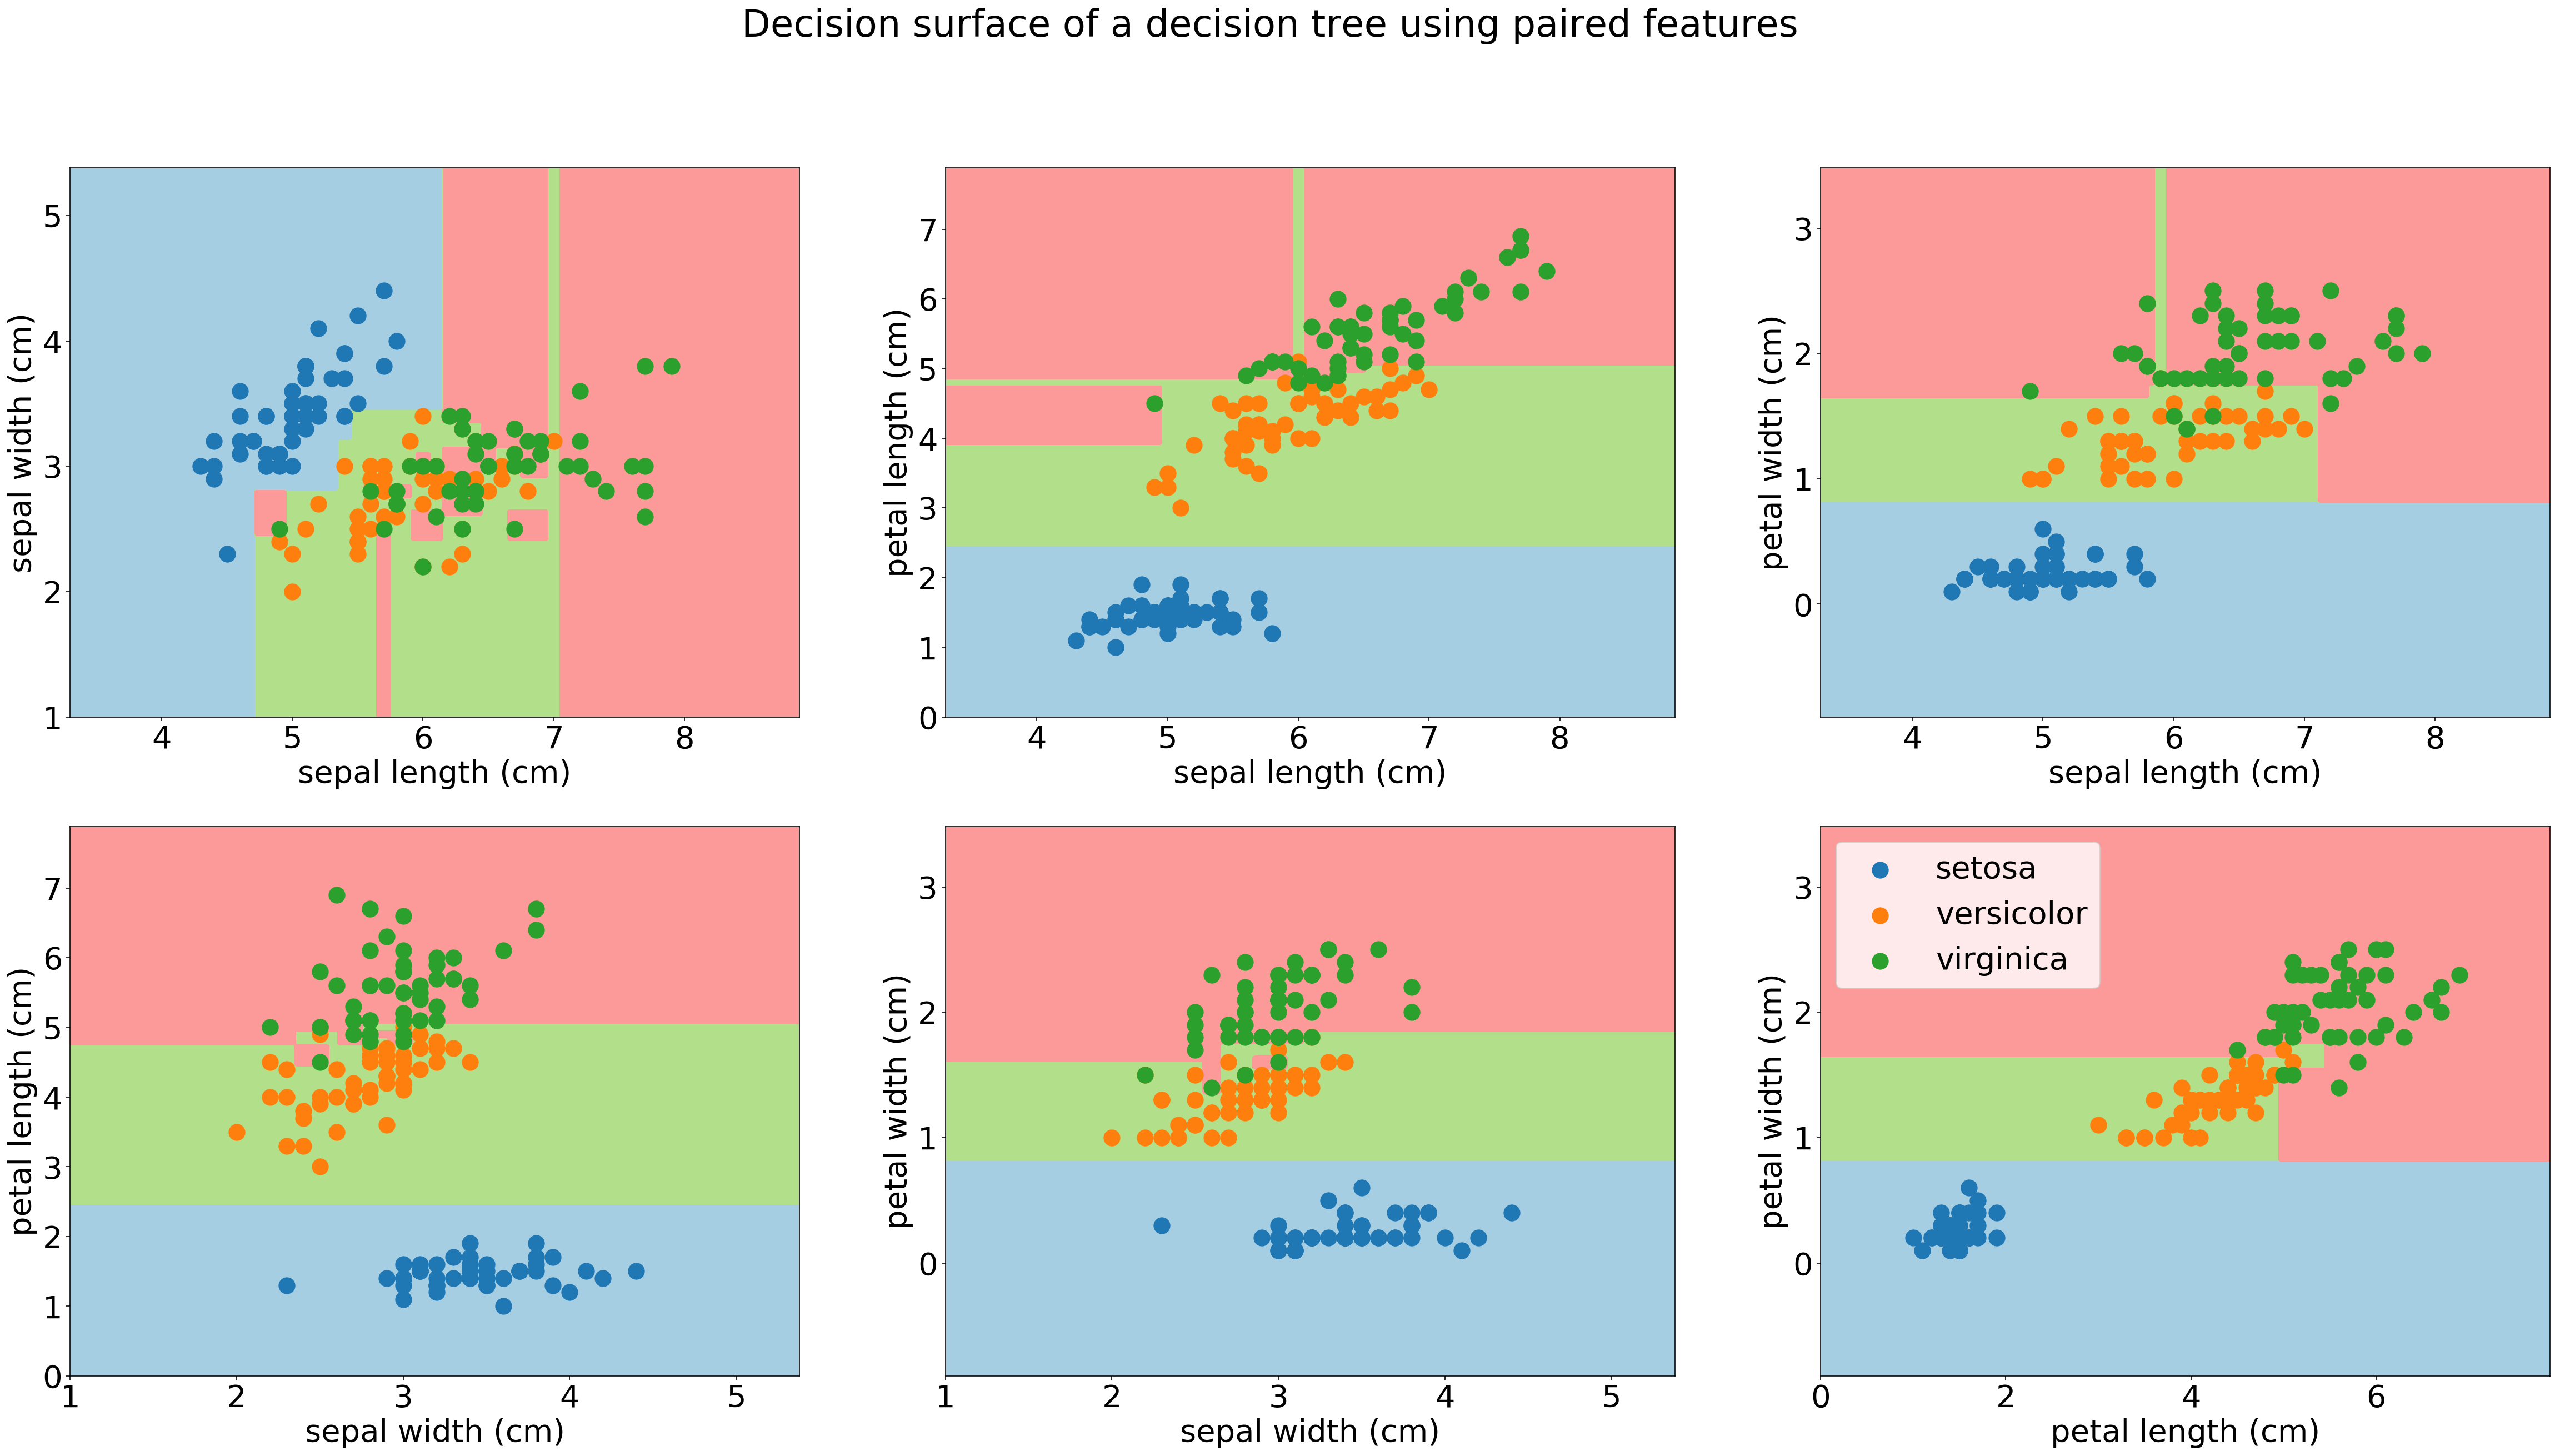

In [2]:
# number of classes in the dataset
n_classes = 3
plot_step = 0.02
plot_colors = "bry"

### Color maps for plotting
data_points_cm = matplotlib.colors.ListedColormap([plt.cm.Paired.colors[1],plt.cm.Paired.colors[3],plt.cm.Paired.colors[5]], name='DataPointsColorMap')
ds_points_cm = matplotlib.colors.ListedColormap([plt.cm.Paired.colors[0],plt.cm.Paired.colors[2],plt.cm.Paired.colors[4]], name='DecisionSurfaceColorMap')

# Load data
iris = load_iris()

plt.rcParams['figure.figsize'] = (40.0, 20.0)
font = {'family' : 'sans', 'size'   : 28}
plt.rc('font', **font)

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=ds_points_cm)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], label=iris.target_names[i], s=200, cmap=data_points_cm)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()